<a href="https://colab.research.google.com/github/LivingstonTardzenyuy/Deep-Learning-with-TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Neural Networks

We will be predicting numerical variables based on some other variables

In [67]:
import tensorflow as tf
print(tf.__version__)

2.17.1


## creating some data to view and fit


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


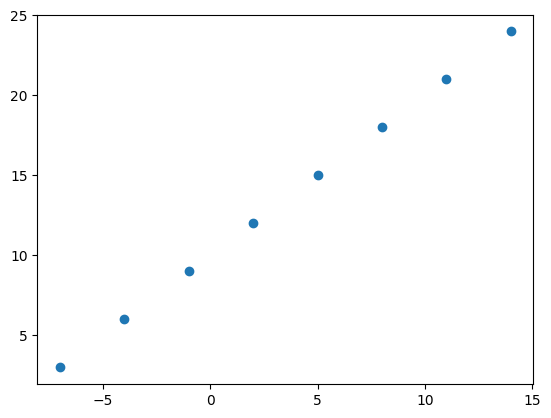

In [69]:
# Create features

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize
plt.scatter(X,y)

### Input and output shapes

In [70]:
# Create a demo tensor for housing predicting problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [71]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [72]:
X[0], y[0]

(-7.0, 3.0)

In [73]:
# Turn our Numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X = tf.expand_dims(X, axis=-1)
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [74]:
input_shape = X[0], X.shape
output_shape = y[0], y.shape

input_shape, output_shape

((<tf.Tensor: shape=(1,), dtype=float64, numpy=array([-7.])>,
  TensorShape([8, 1])),
 (<tf.Tensor: shape=(), dtype=float64, numpy=3.0>, TensorShape([8])))

## Steps in modelling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of of a deep learning model.
2. Compiling a model - define the loss function (the function that tells our function how wrong it is)
3. Evalution Matrix - What we can use to interpret the performance of our model.
4. Fitting our model - Letting model find patterns between X and y (features and labels)


In [75]:
# set the random seed.
tf.random.set_seed(42)

# 1. Create a model usig the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
      loss = tf.keras.losses.mae, # mae is short for mean absolute error.
      optimizer = tf.keras.optimizers.SGD(),  # Stochastic gradient descent(SGD) helps to optimize our ML model
      metrics = ['mae'],
              )

# 3. Fit the model
model.fit(X, y, epochs=5)  # epochs defines how many times to go through the data

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 17.1760 - mae: 17.1760
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 16.8947 - mae: 16.8947
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 16.6135 - mae: 16.6135
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 16.3322 - mae: 16.3322
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 16.0510 - mae: 16.0510


In [76]:
 # check out X and y
 X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [77]:
# Making prediction using our model.
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


array([[-9.831721]], dtype=float32)

In [78]:
y_pred + 13

array([[3.1682787]], dtype=float32)

## How to improve our model

We will improve our model using

1. **Creating a model** Add more layers,
increase each of the hidden layers.

2. **Compiling a model** - here we might change the optimization function or learning rate of the optimization function
3. **Fitting a model** - we might fit a model for more epochs(more training time)

In [79]:
# Let's rebuild our model
tf.random.set_seed(42)

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile our model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics = ['mae']
)

#3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 18.4373 - mae: 18.4373
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 18.1561 - mae: 18.1561
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - loss: 17.8748 - mae: 17.8748
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 17.5936 - mae: 17.5936
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 17.3123 - mae: 17.3123
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 17.0311 - mae: 17.0311
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 16.7498 - mae: 16.7498
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 16.4686 - mae: 16.4686
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 16.1873 - mae: 16.1873
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 15.9061 - mae: 15.9061
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 15.6248 - mae: 15.6248
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 15.3436 - mae: 15.3436
Epoch 13/100
1/1 ━━━━

In [80]:
# our data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [81]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[29.786463]], dtype=float32)

# Wowow our models looks really better now.

Let's try to change another paramter this time optimizer to see the effect

In [82]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['mae']
)

model.fit(X, y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step - loss: 20.5407 - mae: 20.5407
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 20.4807 - mae: 20.4807
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 20.4207 - mae: 20.4207
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 20.3607 - mae: 20.3607
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 20.3007 - mae: 20.3007
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 20.2407 - mae: 20.2407
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 20.1807 - mae: 20.1807
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 20.1207 - mae: 20.1207
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 20.0607 - mae: 20.0607
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 20.0007 - mae: 20.0007
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 19.9407 - mae: 19.9407
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 19.8807 - mae: 19.8807
Epoch 13/100
1/1 ━━━━━━━

In [83]:
model.predict(np.array([17]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[-7.2272363]], dtype=float32)

# Improving our model

We will increase the dense layers

In [84]:
# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation=None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['mae']
)

#3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step - loss: 14.3645 - mae: 14.3645
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13.3935 - mae: 13.3935
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 12.4296 - mae: 12.4296
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.4683 - mae: 11.4683
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 10.5050 - mae: 10.5050
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 9.5334 - mae: 9.5334
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.5467 - mae: 8.5467
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.5375 - mae: 7.5375
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6.6788 - mae: 6.6788
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 6.8987 - mae: 6.8987
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.2651 - mae: 7.2651
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7.5252 - mae: 7.5252
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [85]:
model.predict(np.array([17]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[26.405914]], dtype=float32)

In [86]:
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Evaluating a model

When it comes to evalution.. there are 3 words to remainber.

> "Visualize, visualize, visualize"

It's a good idea to visualize
* The data
* The model
* Training of a model
* The predictions of the model

In [87]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [88]:
# Make labels for dataset

y = X + 10

y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

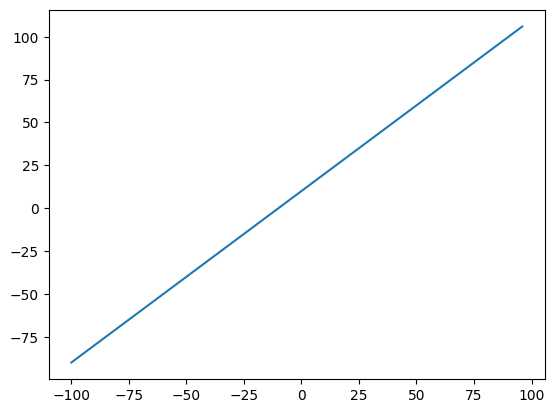

In [89]:
# Visualize the data
import matplotlib.pyplot as plt

plt.plot(X, y)

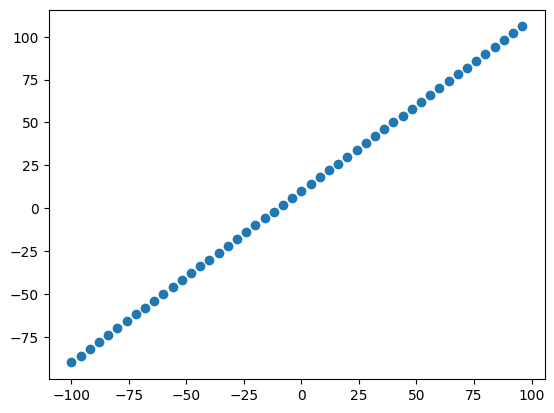

In [90]:
plt.scatter(X, y)

In [91]:
# check the length of our data.

len(X)

50

In [92]:
# Splitting our data into training and test set.

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)


(40, 10)

# Visualizing our data.

Now we've got our data in trianing and test sets... Let's visualize it now.

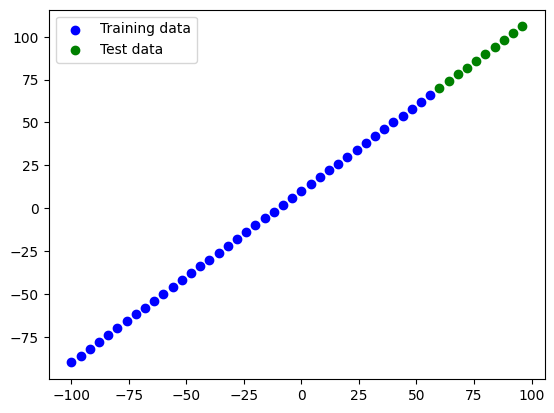

In [93]:
# plot training data
plt.scatter(X_train, y_train, c='b', label='Training data')

# plot test data
plt.scatter(X_test, y_test, c='g', label='Test data')

plt.legend();

In [94]:
# Let's have a look at how to build a neural network for our data.

tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1]),
    # tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)


# 3. Fit the model
model.fit(X_train, y_train, epochs = 100, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
# Making predictions
model.predict(np.array([17]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[15.029359]], dtype=float32)

In [96]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

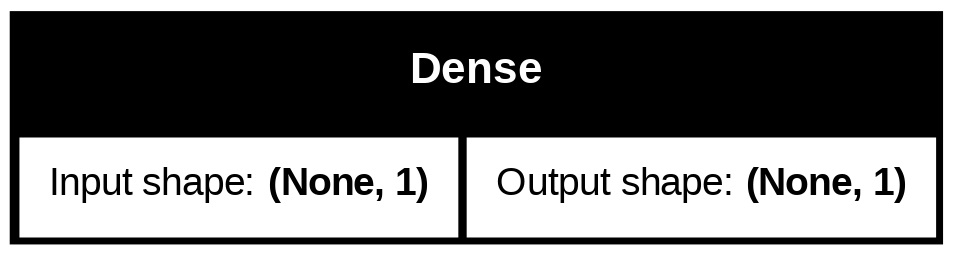

In [97]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

# Visualizing our model predictions

To visualize predicitons, it's a good idea to plot them againts the ground truth labels.



### Evaluating our model's prediction with regression evaluation metrics

In [98]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 23.9733 - mae: 23.9733


[23.973346710205078, 23.973346710205078]

# Calculate the mean absolute error.


In [99]:
tf.keras.losses.MAE(y_test, model.predict(X_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20.431564, 21.218628, 22.005692, 22.792755, 23.579815, 24.366882,
       25.153938, 25.941002, 26.728065, 27.51513 ], dtype=float32)>

In [64]:
# Make some predictions.
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[55.610584],
       [59.224957],
       [62.83933 ],
       [66.4537  ],
       [70.06807 ],
       [73.68244 ],
       [77.296814],
       [80.91119 ],
       [84.52556 ],
       [88.13993 ]], dtype=float32)

In [107]:
tf.constant(y_test)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [106]:
# Calculate the mean absolute error

from tensorflow.keras.metrics import MeanAbsoluteError

mae = MeanAbsoluteError()
mae.update_state(y_test, tf.constant(y_pred))
mae_value = mae.result()

In [108]:
y_pred

array([[-9.831721]], dtype=float32)